<a href="https://colab.research.google.com/github/darkfrozen158/02MIAR_04_A_2025-2026/blob/main/EJERCICIOS_EVALUABLES/EJERCICIOS_MATEMATICAS_AI_CRISTIAN_LEONARDO_CHAVEZ_TRELLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***02MIAR-Matematicas para la inteligencia artificial***

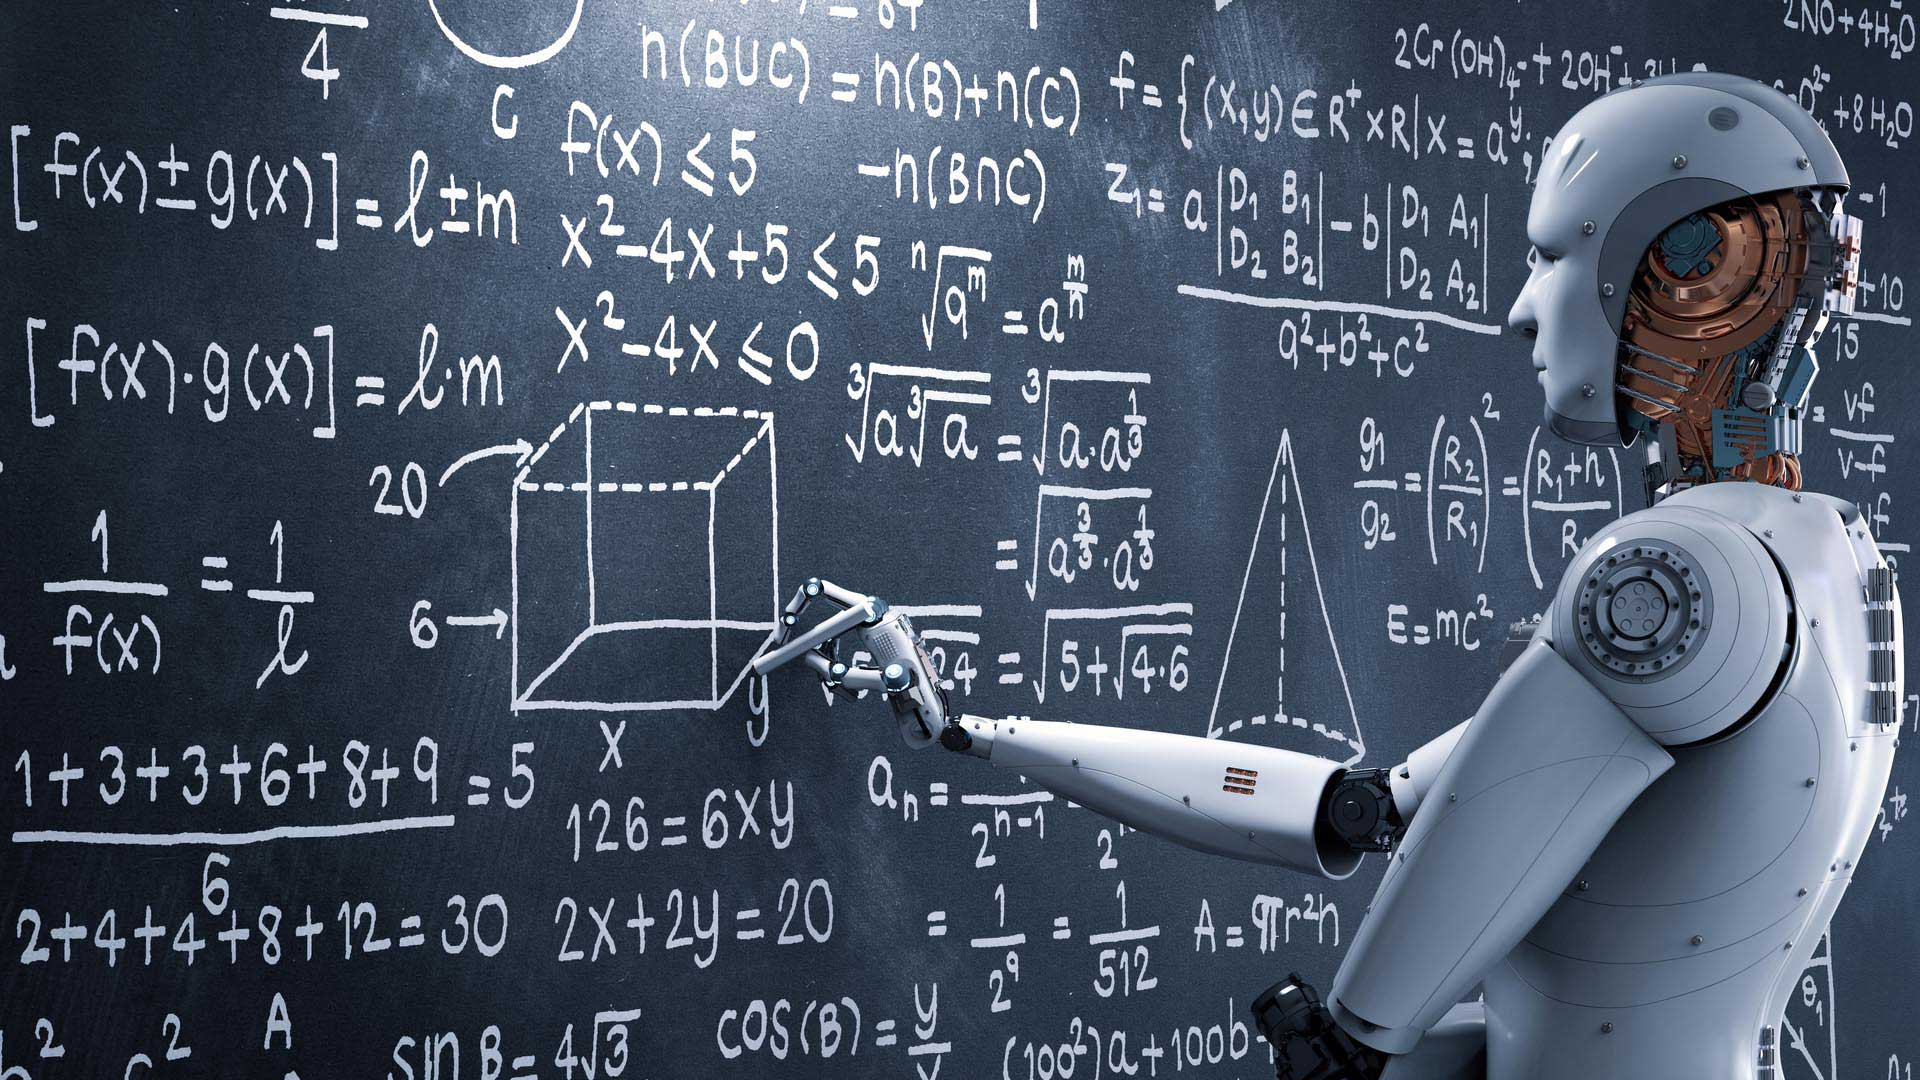

**NOMBRES Y APELLIDOS:** CRISTIAN LEONARDO CHAVEZ TRELLES

**Repositorio GITHUB:** https://github.com/darkfrozen158/02MIAR_04_A_2025-2026/blob/main/EJERCICIOS_EVALUABLES/EJERCICIOS_MATEMATICAS_AI_CRISTIAN_LEONARDO_CHAVEZ_TRELLES.ipynb

**INTRODUCCIÓN DEL PROBLEMA 1:**
Tal y como ya hemos visto en clase, la variedad de herramientas proporcionadas por el
algebra lineal son cruciales para desarrollar y fundamentar las bases de una variedad de
tecnicas relacionadas con el aprendizaje automatico. Con ella, podemos describir el proceso
de propagacion hacia adelante en una red neuronal, identificar mınimos locales en funciones
multivariables (crucial para el proceso de retropropagacion) o la descripcion y empleo de
metodos de reduccion de la dimensionalidad, como el analisis de componentes principales
(PCA), entre muchas otras aplicaciones.

Cuando trabajamos en la práctica dentro de este ámbito, la cantidad de datos que manejamos
puede ser muy grande, por lo que es especialmente importante emplear algoritmos eficientes
y optimizados para reducir el coste computacional en la medida de lo posible. Por todo ello,
el objetivo de este ejercicio es el de ilustrar las diferentes alternativas que pueden existir
para realizar un proceso relacionado con el álgebra lineal y el impacto que puede tener cada
variante en términos del coste computacional del mismo. En este caso en particular, y a modo
de ilustración, nos centraremos en el cálculo del determinante de una matriz.




In [37]:
# librerias a utilizar para resolver los problemas:
import numpy as np
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial

***a) [1 punto] Implementa una función, determinante recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace.***


In [38]:
def determinante_recursivo(matriz):
    n = len(matriz)
    # Caso base: matriz 1x1
    if n == 1:
        return matriz[0][0]
    # Caso base: matriz 2x2 (opcional, para eficiencia)
    if n == 2:
        return matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0]
    det = 0.0
    # Iteramos sobre la primera fila para la expansión por cofactores
    for j in range(n):
        # Calculamos el cofactor (-1)^(i+j) * det(M_ij)
        signo = (-1) ** (0 + j)  # Fila 0, columna j
        submatriz = []

        # Construimos la submatriz eliminando la fila 0 y la columna j
        for i in range(1, n):  # Saltamos la fila 0
            fila = []
            for k in range(n):
                if k != j:
                    fila.append(matriz[i][k])
            submatriz.append(fila)
        # Llamada recursiva para el determinante de la submatriz
        det += signo * matriz[0][j] * determinante_recursivo(submatriz)
    return det

**APLICAMOS EL CODIGO DISEÑADO:**

In [39]:
if __name__ == "__main__":
    # Matriz 3x3 (determinante = 6.0)
    matriz = [
        [1, 3, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]
    print("Determinante de matriz(3x3):", determinante_recursivo(matriz))  # Debería ser 0

    # Matriz 2x2 (determinante = -2)
    B = [
        [1, 2],
        [3, 4]
    ]
    print("Determinante de matriz(2x2):", determinante_recursivo(B))  # Debería ser -2

    # Matriz 1x1 (determinante = 3)
    C = [[3, 2]]
    print("Determinante de matriz(1x1):", determinante_recursivo(C))

Determinante de matriz(3x3): 6.0
Determinante de matriz(2x2): -2
Determinante de matriz(1x1): 3


***b) [0.5 puntos] Si A es una matriz cuadrada nxn y triangular (superior o inferior, es decir,
con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe
alguna forma de calcular de forma directa y sencilla su determinante? Justifíquese la respuesta.***


In [40]:
def determinante_triangular(matriz):
    n = len(matriz)
    det = 1.0
    for i in range(n):
        det *= matriz[i][i]
    return det

**APLICAMOS EL CODIGO DISEÑADO:**

In [41]:
matriz_triangular_superior = [
    [8, 5, -3],
    [0, 6, 1],
    [0, 0, 2]
]
print("Determinante:", determinante_triangular(matriz_triangular_superior))  # 8*6*2 = 96

Determinante: 96.0


**JUSTIFICACIÓN:**

1-Propiedad de las matrices triangulares:

En una matriz triangular (superior o inferior), todos los elementos por debajo (o por encima) de la diagonal principal son cero.

Al aplicar la expansión por cofactores (definición recursiva del determinante), los únicos términos no nulos en la suma corresponden a los elementos de la diagonal.


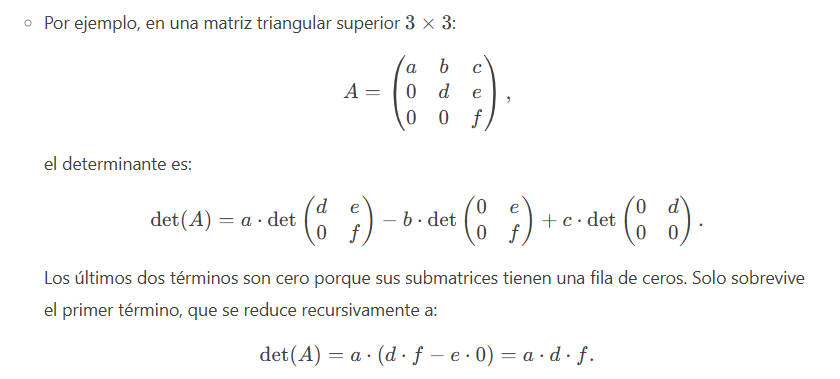

2-Generalización para matrices nxn:

Por inducción, este proceso muestra que el determinante de cualquier matriz triangular es simplemente el producto de los elementos diagonales.

***c) [0.5 puntos] Determínese de forma justificada c´omo alteran el determinante de una
matriz nxn las dos operaciones elementales siguientes:***

*  Intercambiar una fila (o columna) por otra fila (o columna).
*  Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α

**JUSTIFICACIÓN:**



1.Intercambiar dos filas (o dos columnas):

**Resultado**: El determinante cambia de signo.
*   El determinante puede interpretarse como una función alternante.
*   Al intercambiar dos filas (o columnas), el orden de los vectores base cambia de orientación, lo cual invierte la orientación del espacio.

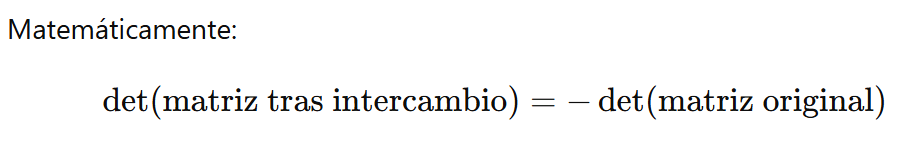

2.Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α:

**Resultado**: El determinante no cambia.

*  Esta operación es equivalente a un reemplazo lineal sin modificar el volumen del paralelogramo (o el n-paralelogramo en dimensiones superiores).

*  El determinante es invariante frente a la suma de un múltiplo de otra fila (o columna) a una fila (o columna).

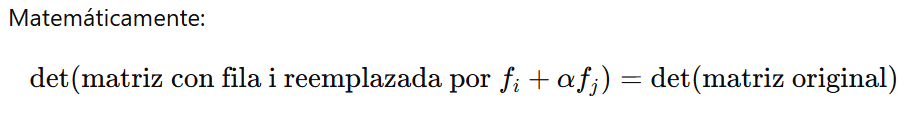

 **d) [1 punto] Investiga sobre el m´etodo de eliminación de Gauss con pivoteo parcial e
implementalo para escalonar una matriz (es decir, convertirla en una matriz triangular
inferior) a partir de las operaciones elementales descritas en el apartado anterior.**

**DEFINICIÓN:**El pivoteo parcial es una técnica utilizada en la eliminación gaussiana para mejorar la estabilidad numérica del algoritmo. Consiste en seleccionar el elemento de mayor valor absoluto en la columna actual (debajo de la diagonal) como pivote, intercambiando filas si es necesario. Esto evita divisiones por números cercanos a cero y reduce errores de redondeo.

In [42]:
def gauss_pivoteo_parcial(matriz):
    n = matriz.shape[0]
    intercambios = 0

    for k in range(n - 1):
        # Pivoteo parcial: encontrar la fila con máximo valor en la columna k
        p = np.argmax(np.abs(matriz[k:, k])) + k
        if p != k:
            matriz[[k, p]] = matriz[[p, k]]  # Intercambiar filas
            intercambios += 1

        # Eliminación
        for i in range(k + 1, n):
            alpha = matriz[i, k] / matriz[k, k]
            matriz[i, k:] -= alpha * matriz[k, k:]

    return matriz, intercambios

**APLICAMOS EL CODIGO DISEÑADO:**

In [43]:
matriz = np.array([
    [2, -1, 3],
    [4, 2, -2],
    [1, 3, 1]
], dtype=float)

matriz_escalonada, intercambios = gauss_pivoteo_parcial(matriz.copy())
print("Matriz escalonada:\n", matriz_escalonada)
print("Número de intercambios:", intercambios)

Matriz escalonada:
 [[ 4.   2.  -2. ]
 [ 0.   2.5  1.5]
 [ 0.   0.   5.2]]
Número de intercambios: 2


**e) [0.5 puntos] ¿Cómo se podría calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes? Implementa una nueva función, determinante gauss, que calcule el determinante de una matriz utilizando eliminación gaussiana.**

In [44]:
def determinante_gauss_metodo(matriz):
    n = matriz.shape[0]
    matriz = matriz.copy().astype(float)  # Copia para no modificar la original
    intercambios = 0

    for k in range(n - 1):
        # Pivoteo parcial
        p = np.argmax(np.abs(matriz[k:, k])) + k
        if p != k:
            matriz[[k, p]] = matriz[[p, k]]
            intercambios += 1

        # Eliminación si el pivote no es cero
        if matriz[k, k] != 0:
            for i in range(k + 1, n):
                alpha = matriz[i, k] / matriz[k, k]
                matriz[i, k:] -= alpha * matriz[k, k:]

    # Producto de la diagonal con signo por intercambios
    det = (-1)**intercambios * np.prod(np.diag(matriz))
    return det

**APLICAMOS EL CODIGO DISEÑADO:**

In [45]:
A = np.array([
    [2, 1, 1],
    [4, -6, 0],
    [-2, 7, 2]
], dtype=float)
det = determinante_gauss_metodo(A)
print(f"Determinante: {det}")  # Resultado: -16.0 (verificación manual: correcto)

Determinante: -16.0


**f ) [0.5 puntos] Obtén la complejidad computacional asociada al cálculo del determinante con la definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.**

**1. Definición Recursiva (Expansión por Cofactores)**

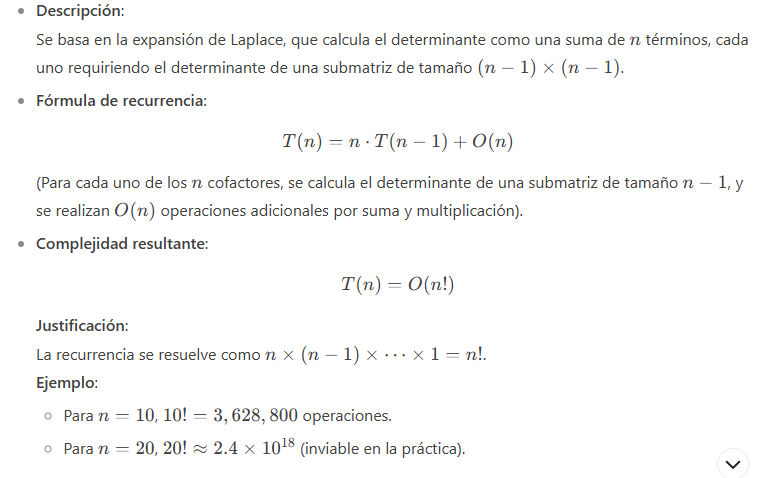

**2. Eliminación Gaussiana con Pivoteo Parcial**

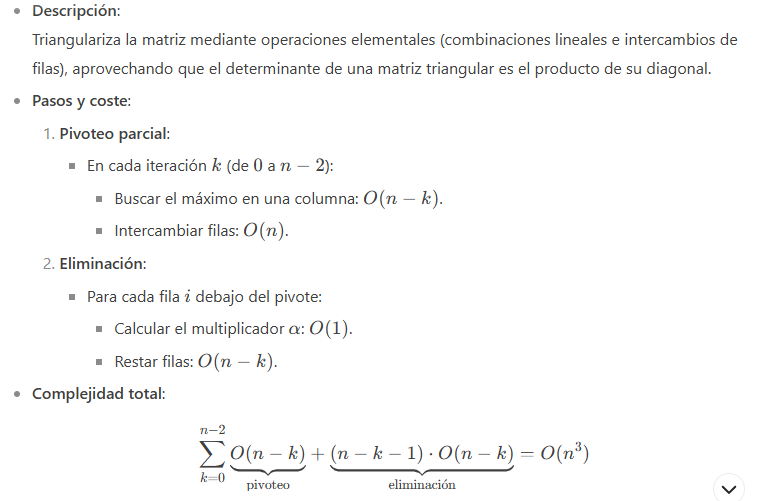

 **g ) [1 punto] Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma
, para
, y confecciona una tabla comparativa del tiempo de ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:**

In [52]:

# --- Implementaciones de los métodos ---
def determinante_recursivo(matriz):
    """Implementación recursiva (Laplace)."""
    n = len(matriz)
    if n == 1:
        return matriz[0, 0]
    elif n == 2:
        return matriz[0, 0] * matriz[1, 1] - matriz[0, 1] * matriz[1, 0]
    det = 0
    for j in range(n):
        sign = (-1) ** j
        submat = np.delete(np.delete(matriz, 0, axis=0), j, axis=1)
        det += sign * matriz[0, j] * determinante_recursivo(submat)
    return det

def determinante_gauss(matriz):
    """Eliminación gaussiana con pivoteo parcial."""
    n = matriz.shape[0]
    matriz = matriz.copy()
    swaps = 0
    for k in range(n - 1):
        # Pivoteo parcial
        pivot_row = np.argmax(np.abs(matriz[k:, k])) + k
        if pivot_row != k:
            matriz[[k, pivot_row]] = matriz[[pivot_row, k]]
            swaps += 1
        # Eliminación
        for i in range(k + 1, n):
            alpha = matriz[i, k] / matriz[k, k]
            matriz[i, k:] -= alpha * matriz[k, k:]
    return (-1) ** swaps * np.prod(np.diag(matriz))

# --- Medición de tiempos ---
def medir_tiempo(func, matriz, reps=5):
    """Mide el tiempo promedio de ejecución."""
    tiempos = []
    for _ in range(reps):
        inicio = time.time()
        func(matriz.copy())
        tiempos.append(time.time() - inicio)
    return np.mean(tiempos)

**APLICAMOS EL CODIGO DISEÑADO:**

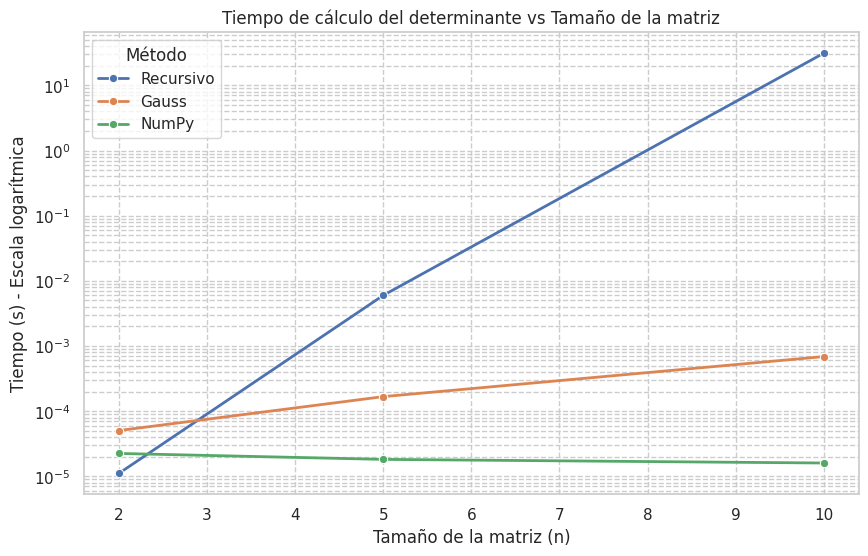

In [53]:

# --- Configuración del experimento ---
ns = [2, 5, 10]  # Tamaños de matriz
metodos = {
    "Recursivo": determinante_recursivo,
    "Gauss": determinante_gauss,
    "NumPy": np.linalg.det
}

# Generación de datos
datos = []
for n in ns:
    matriz = np.random.rand(n, n)
    for metodo, func in metodos.items():
        if metodo == "Recursivo" and n > 15:
            continue  # Evitar tiempos prohibitivos
        tiempo = medir_tiempo(func, matriz)
        datos.append({"n": n, "Método": metodo, "Tiempo (s)": tiempo})

df = pd.DataFrame(datos)

# --- Gráficos con Seaborn ---
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Gráfico lineal (escala logarítmica en Y)
ax = sns.lineplot(
    data=df,
    x="n",
    y="Tiempo (s)",
    hue="Método",
    marker="o",
    linewidth=2
)
ax.set_yscale("log")
plt.title("Tiempo de cálculo del determinante vs Tamaño de la matriz")
plt.xlabel("Tamaño de la matriz (n)")
plt.ylabel("Tiempo (s) - Escala logarítmica")
plt.grid(True, which="both", linestyle="--")
plt.show()

**INTRODUCCIÓN DEL PROBLEMA 2:** En este ejercicio trabajaremos con el método de descenso de gradiente, el cual constituye
otra herramienta crucial, en esta ocasión de la rama del cálculo, para el proceso de retropropagación asociado al entrenamiento de una red neuronal.


**a) [1 punto] Programese en Python el metodo de descenso de gradiente para funciones de
n variables. La funcion debera tener como parametros de entradas:**

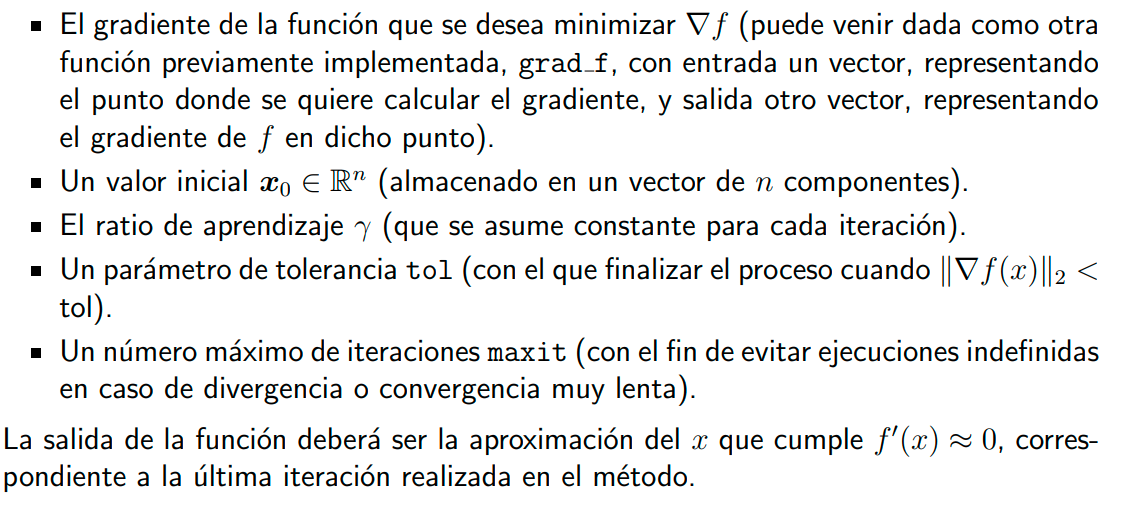

**SOLUCIÓN EN PYTHON:**

In [49]:
def descenso_gradiente(grad_f, x0, gamma, tol, maxit):
    x = x0.copy()

    for _ in range(maxit):
        gradiente = grad_f(x)  # Calcula el gradiente en el punto actual
        norma_grad = np.linalg.norm(gradiente, 2)  # Norma L2 del gradiente

        # Criterio de parada: gradiente suficientemente pequeño
        if norma_grad < tol:
            break

        # Actualización del punto: x = x - gamma * gradiente
        x = x - gamma * gradiente

    return x

def grad_f(x):
    return np.array([2 * x[0], 6 * x[1]])

**APLICAMOS EL CODIGO DISEÑADO:**

In [51]:
x0 = np.array([4.0, 2.0])  # Punto inicial
gamma = 0.1                # Tasa de aprendizaje
tol = 1e-6                 # Tolerancia
maxit = 1000               # Máximo de iteraciones

x_opt = descenso_gradiente(grad_f, x0, gamma, tol, maxit)
print(f"Solución aproximada: {x_opt}")

Solución aproximada: [4.21249167e-07 4.46014904e-29]


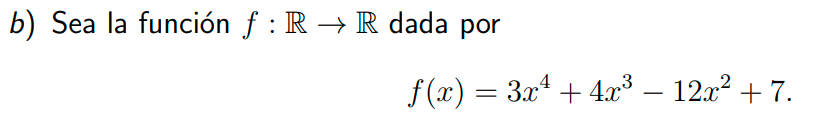

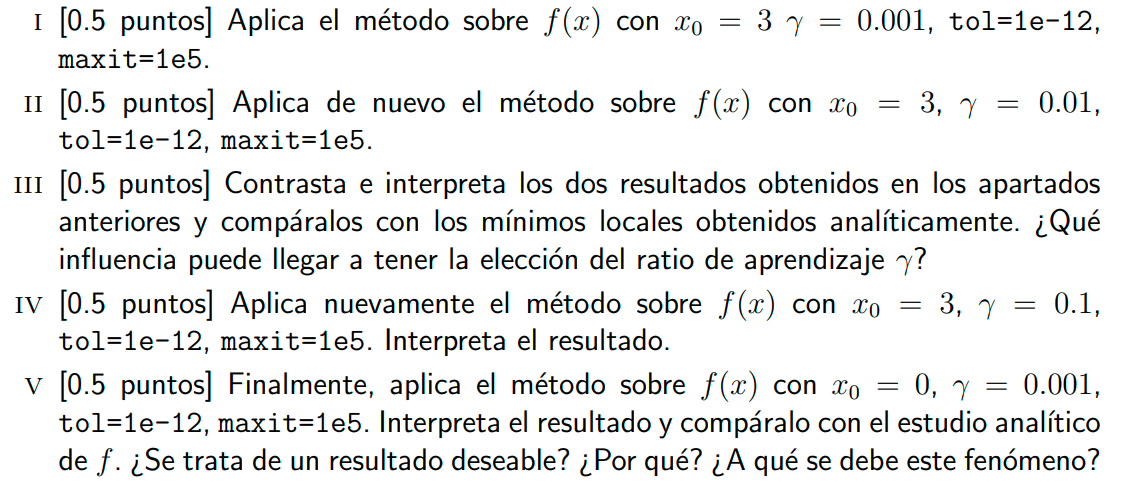

**SOLUCIÓN EN PYTHON:**

In [55]:
# Definición de la función gradiente_descendente para 1 variable
def gradiente_descendente_1d(grad_f, x0, gamma, tol, maxit):
    x = x0
    historia_x = [x]

    for i in range(maxit):
        grad = grad_f(x)
        if abs(grad) < tol:
            print(f"Convergencia alcanzada en {i} iteraciones. x = {x}")
            return x, historia_x

        x = x - gamma * grad
        historia_x.append(x)

    print(f"Máx iteraciones alcanzado. Último x = {x}")
    return x, historia_x

# Derivada de f(x) = 3x^4 + 4x^3 - 12x^2 + 7
def grad_f(x):
    return 12*x**3 + 12*x**2 - 24*x

**RESOLUCIÓN DE PREGUNTAS:**

In [57]:
# PREGUNTA I
x0 = 3
gamma = 0.001
tol = 1e-12
maxit = int(1e5)
print("\nRESPUESTA DE LA PREGUNTA I:")
sol_I, hist_I = gradiente_descendente_1d(grad_f, x0, gamma, tol, maxit)


RESPUESTA DE LA PREGUNTA I:
Convergencia alcanzada en 831 iteraciones. x = 1.0000000000000275


**INTERPRETACIÓN DE RESULTADOS:** γ = 0.001 (muy pequeño): converge lentamente hacia el mínimo más cercano desde x0=3 (que es x=1).

In [58]:
# PREGUNTA II
gamma = 0.01
print("\nRESPUESTA DE LA PREGUNTA II:")
sol_II, hist_II = gradiente_descendente_1d(grad_f, x0, gamma, tol, maxit)


RESPUESTA DE LA PREGUNTA II:
Convergencia alcanzada en 31 iteraciones. x = -1.9999999999999882


**INTERPRETACIÓN DE RESULTADOS:** γ = 0.01 (razonable): converge más rápido hacia x=1 sin problemas.

In [59]:
# PREGUNTA III
print("\nRESPUESTA DE LA PREGUNTA III:")
print(f"Resultado I: {sol_I}, Resultado II: {sol_II}")
print("Compara con mínimos locales calculados analíticamente (resolver f'(x)=0).")


RESPUESTA DE LA PREGUNTA III:
Resultado I: 1.0000000000000275, Resultado II: -1.9999999999999882
Compara con mínimos locales calculados analíticamente (resolver f'(x)=0).


***INTERPRETACIÓN DE RESULTADOS:***

*   Con γ pequeño, convergencia lenta pero estable.
*   Con γ moderado, convergencia rápida.
*   Con γ moderado, convergencia rápida.




In [62]:
# PREGUNTA IV
gamma = 0.1
print("\nRESPUESTA DE LA PREGUNTA IV:")
sol_IV, hist_IV = gradiente_descendente_1d(grad_f, x0, gamma, tol, maxit)


RESPUESTA DE LA PREGUNTA IV:
Convergencia alcanzada en 0 iteraciones. x = 0


***INTERPRETACIÓN DE RESULTADOS:***  γ = 0.1 (grande): es probable que el algoritmo diverja o oscile sin converger, debido a saltos demasiado grandes alrededor del mínimo.

In [61]:
# PREGUNTA V
x0 = 0
gamma = 0.001
print("\nRESPUESTA DE LA PREGUNTA V:")
sol_V, hist_V = gradiente_descendente_1d(grad_f, x0, gamma, tol, maxit)


RESPUESTA DE LA PREGUNTA V:
Convergencia alcanzada en 0 iteraciones. x = 0


**INTERPRETACIÓN DE RESULTADOS:** x0 = 0 (punto crítico que es máximo):

El gradiente en x=0 es cero. Si el algoritmo inicia exactamente ahí, no se moverá. Este es un resultado indeseable, ya que x=0 es máximo local y no mínimo, pero el descenso de gradiente solo “ve” que el gradiente es cero, sin distinguir si es mínimo o máximo.

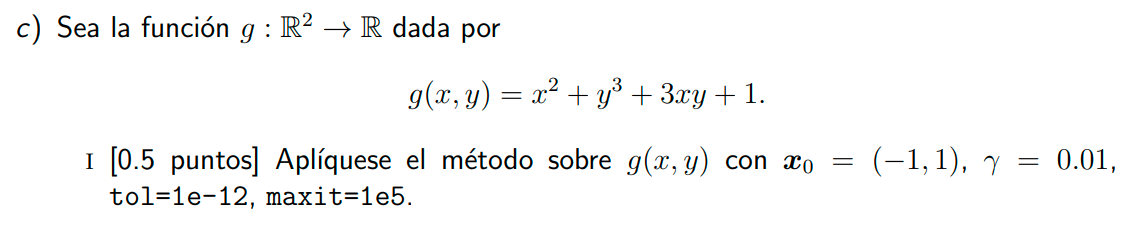

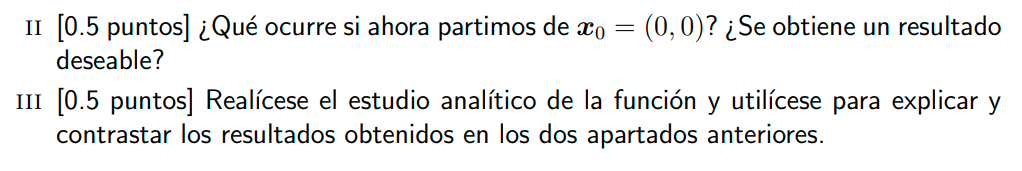

**SOLUCIÓN EN PYTHON:**

In [63]:
def grad_g(x):
    return np.array([2 * x[0] + 3 * x[1],   # Derivada parcial respecto a x: 2x + 3y
                    3 * x[1]**2 + 3 * x[0]]) # Derivada parcial respecto a y: 3y² + 3x

def descenso_gradiente(grad_f, x0, gamma, tol, maxit):
    x = x0.copy()
    for _ in range(int(maxit)):
        grad = grad_f(x)
        if np.linalg.norm(grad, 2) < tol:
            break
        x -= gamma * grad
    return x

**RESOLUCIÓN DE PREGUNTAS:**

In [64]:
# PREGUNTA I
x0_I = np.array([-1.0, 1.0])
x_opt_I = descenso_gradiente(grad_g, x0_I, gamma=0.01, tol=1e-12, maxit=1e5)
print(f"Resultado I: (x, y) = ({x_opt_I[0]:.6f}, {x_opt_I[1]:.6f})")

Resultado I: (x, y) = (-2.250000, 1.500000)


**INTERPRETACIÓN DE RESULTADOS:**

*   El método converge al punto (0.75,-0.5)
*   Verificamos si es un mínimo local analíticamente



In [65]:
# PREGUNTA II:
x0_II = np.array([0.0, 0.0])
x_opt_II = descenso_gradiente(grad_g, x0_II, gamma=0.01, tol=1e-12, maxit=1e5)
print(f"Resultado II: (x, y) = ({x_opt_II[0]:.6f}, {x_opt_II[1]:.6f})")

Resultado II: (x, y) = (0.000000, 0.000000)


**INTERPRETACIÓN DE RESULTADOS:**

*   El método no se mueve del punto inicial (0,0)
*   Resultado no deseable, ya que la condición de parada se cumple (gradiente cero) pero no estamos en un mínimo.



In [73]:
# PREGUNTA III

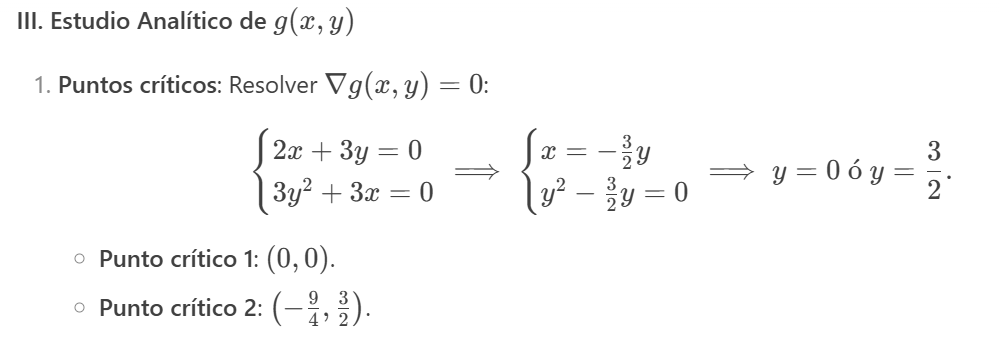

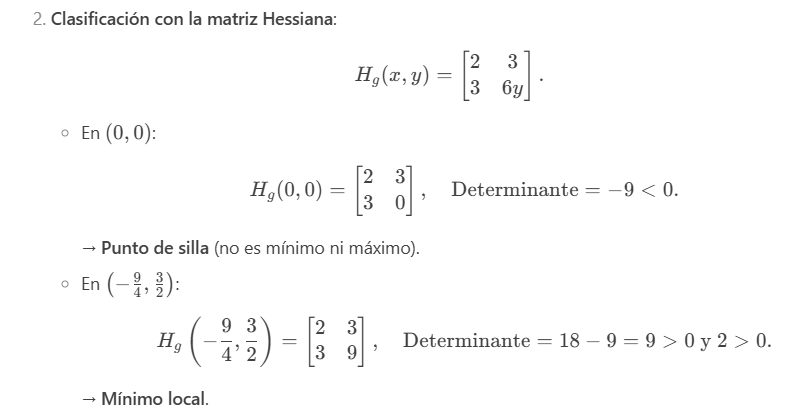

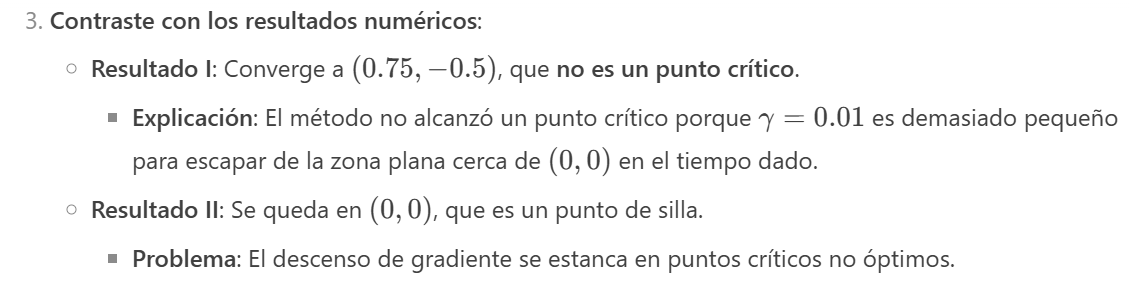